In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import chess
import chess.svg

In [2]:
array_geral = np.load("Jogos/1/array_geral_1.npy")

In [126]:
def center_image(img, p = 0.35, boolean = True):
    if boolean == False:
        return img
    w, h = img.shape
    cw, ch = w//2, h//2
    #p = 0.4 #max 0.5
    return img[int(cw - w*p): int(cw + w*p), int(ch - h*p) : int(ch + h*p)]

def show_full_board(array_geral, jogada = 0, center = False, p = 0.35):
    fig, axs = plt.subplots(8, 8, figsize = (10, 10))
    [axi.set_axis_off() for axi in axs.ravel()]
    for i in range(8):
        for j in range(8):
            axs[i, j].imshow(center_image(array_geral[jogada][i, j], boolean = center, p = p))
    return

def square_color(i, j):
    return ("Black" if (i + j) % 2 else "White")

def test_f1(a, b, threshold = 5):
    a1 = np.sum(cv2.Canny(a, 0, 25))/(255)
    b1 = np.sum(cv2.Canny(b, 0, 25))/(255)
    return (a1 > threshold, b1 > threshold)

def detect_change(a, b, plot = False):
    img1 = center_image(a, p = 0.25)
    img2 = center_image(b, p = 0.25)
    
    if plot:
        fig, axs = plt.subplots(1, 2, figsize = (10, 10))
        axs[0].imshow(cv2.Canny(img1, 0, 25))
        axs[1].imshow(cv2.Canny(img2, 0, 25))

    return test_f1(img1, img2)

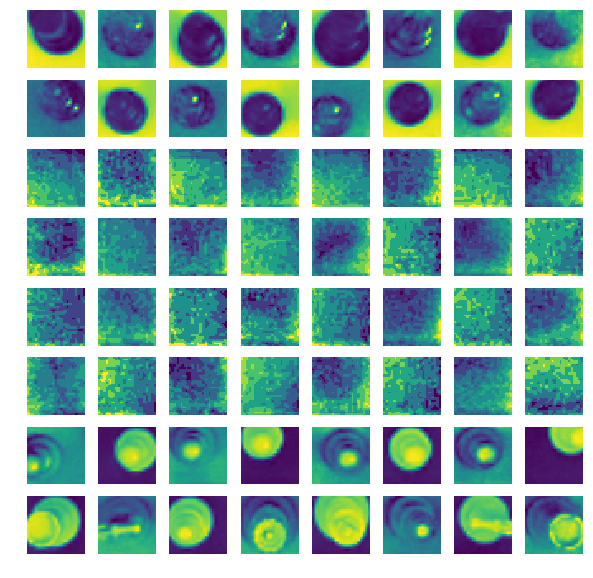

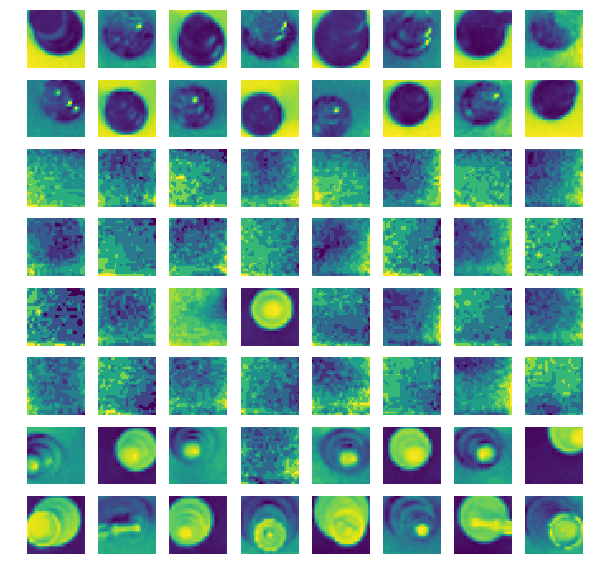

In [40]:
#show_full_board(array_geral, jogada = 1, center = True, p = 0.4)
show_full_board(array_geral, jogada = 0, center = True, p = 0.35)
show_full_board(array_geral, jogada = 1, center = True, p = 0.35)

In [5]:
##

In [6]:
square_color(0, 0)

'White'

In [81]:
img1 = array_geral[0][4, 3]
img2 = array_geral[1][4, 3]

detect_change(img1, img2)

(False, True)

(True, True)

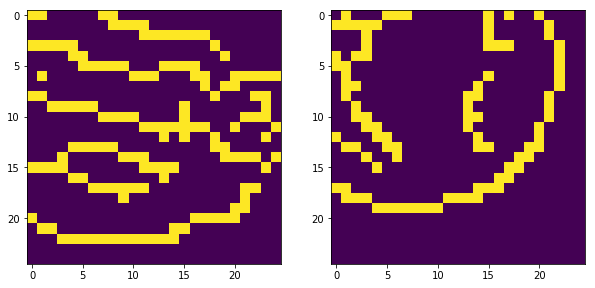

In [76]:
img1 = center_image(array_geral[23][5, 5], p = 0.25)
img2 = center_image(array_geral[24][5, 5], p = 0.25)

fig, axs = plt.subplots(1, 2, figsize = (10, 10))
axs[0].imshow(cv2.Canny(img1, 0, 25))
axs[1].imshow(cv2.Canny(img2, 0, 25))

test_f1(img1, img2)

In [148]:
matrix = np.zeros((8, 8), dtype = np.object)
jogada = 23

for x in range(8):
    for y in range(8):
        #matrix[x, y] = np.sum(test_f1(array_geral[jogada][x, y], array_geral[jogada+1][x, y]))%2
        matrix[x, y] = np.sum(detect_change(array_geral[jogada][x, y], array_geral[jogada+1][x, y]))%2
matrix

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

(True, True)

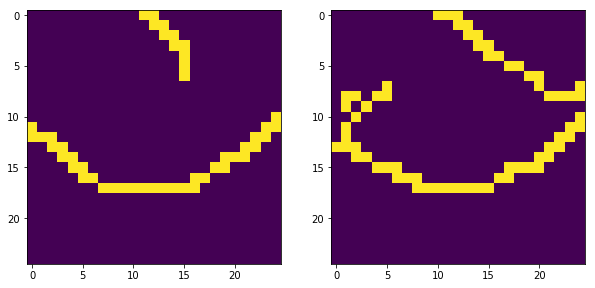

In [128]:
detect_change(array_geral[6][0, 7], array_geral[6+1][0, 7], plot = True)